## Definiton

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import plotly.graph_objects as go
from scipy.integrate import solve_ivp
%config InlineBackend.figure_format='retina'

In [65]:
def rossler(X, t, a, b, c):
    x, y, z = X
    return np.array([-y - z, x + a * y, b + z * (x - c)])



def plot2d(init, params, start, end, points, second_init=None):
    x0, y0, z0 = init
    a, b, c = params
    plt.figure(figsize=(13, 8))
    trajectory2 = []

    trajectory1 = odeint(
        rossler, np.array([x0, y0, z0]), np.linspace(start, end, points), args=(a, b, c)
    )
    plt.plot(trajectory1[:, 0], trajectory1[:, 1])

    if second_init:
      x1, y1, z1 = second_init
      trajectory2 = odeint(
        rossler, np.array([x1, y1, z1]), np.linspace(start, end, points), args=(a, b, c)
      )
      plt.plot(trajectory2[:, 0], trajectory2[:, 1])
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Trajectory projection to z=0 plane\na={a}, b={b}, c={c}')

    return trajectory1, trajectory2


def plot3d(trajectory1, trajectory2):
    if len(trajectory2) != 0:
        go.Figure(
            [
                go.Scatter3d(
                    x=trajectory1[:, 0], y=trajectory1[:, 1], z=trajectory1[:, 2], mode="lines"
                ),
                go.Scatter3d(
                    x=trajectory2[:, 0], y=trajectory2[:, 1], z=trajectory2[:, 2], mode="lines"
                ),
            ]
        ).show()
    else:
        go.Figure(
              [
                  go.Scatter3d(
                      x=trajectory1[:, 0], y=trajectory1[:, 1], z=trajectory1[:, 2], mode="lines"
                  ),
              ]
        ).show()

## Initialization

In [45]:
a = .2
b = .2
c = 5.7
init1 = [.5, .3, .1]
init2 = []
points = 500
start = 0
end = 30

In [59]:
try:
    a, b, c = [float(t) for t in input("Enter params for system (with spacing): ").split()]
    init1 = [float(t) for t in input("Enter initial value coordinates (with spacing): ").split()]
    inp = input("Enter second initial value coordinates (if you wish to): ").split()
    init2 = [float(t) for t in inp] if len(inp) == 3 else None
    points = int(input("Enter number of points for visualization: "))
    start, end = [float(t) for t in input("Enter start and end time (with spacing): ").split()]
except Exception as e:
    print(f'Error in initialization occured. Message:\t"{e}"')

Enter params for system (with spacing): .2 .2 5.7
Enter initial value coordinates (with spacing): .1 .1 .1
Enter second initial value coordinates (if you wish to): .10001 .10001 .10001
Enter number of points for visualization: 3000
Enter start and end time (with spacing): 0 120


## Visualization

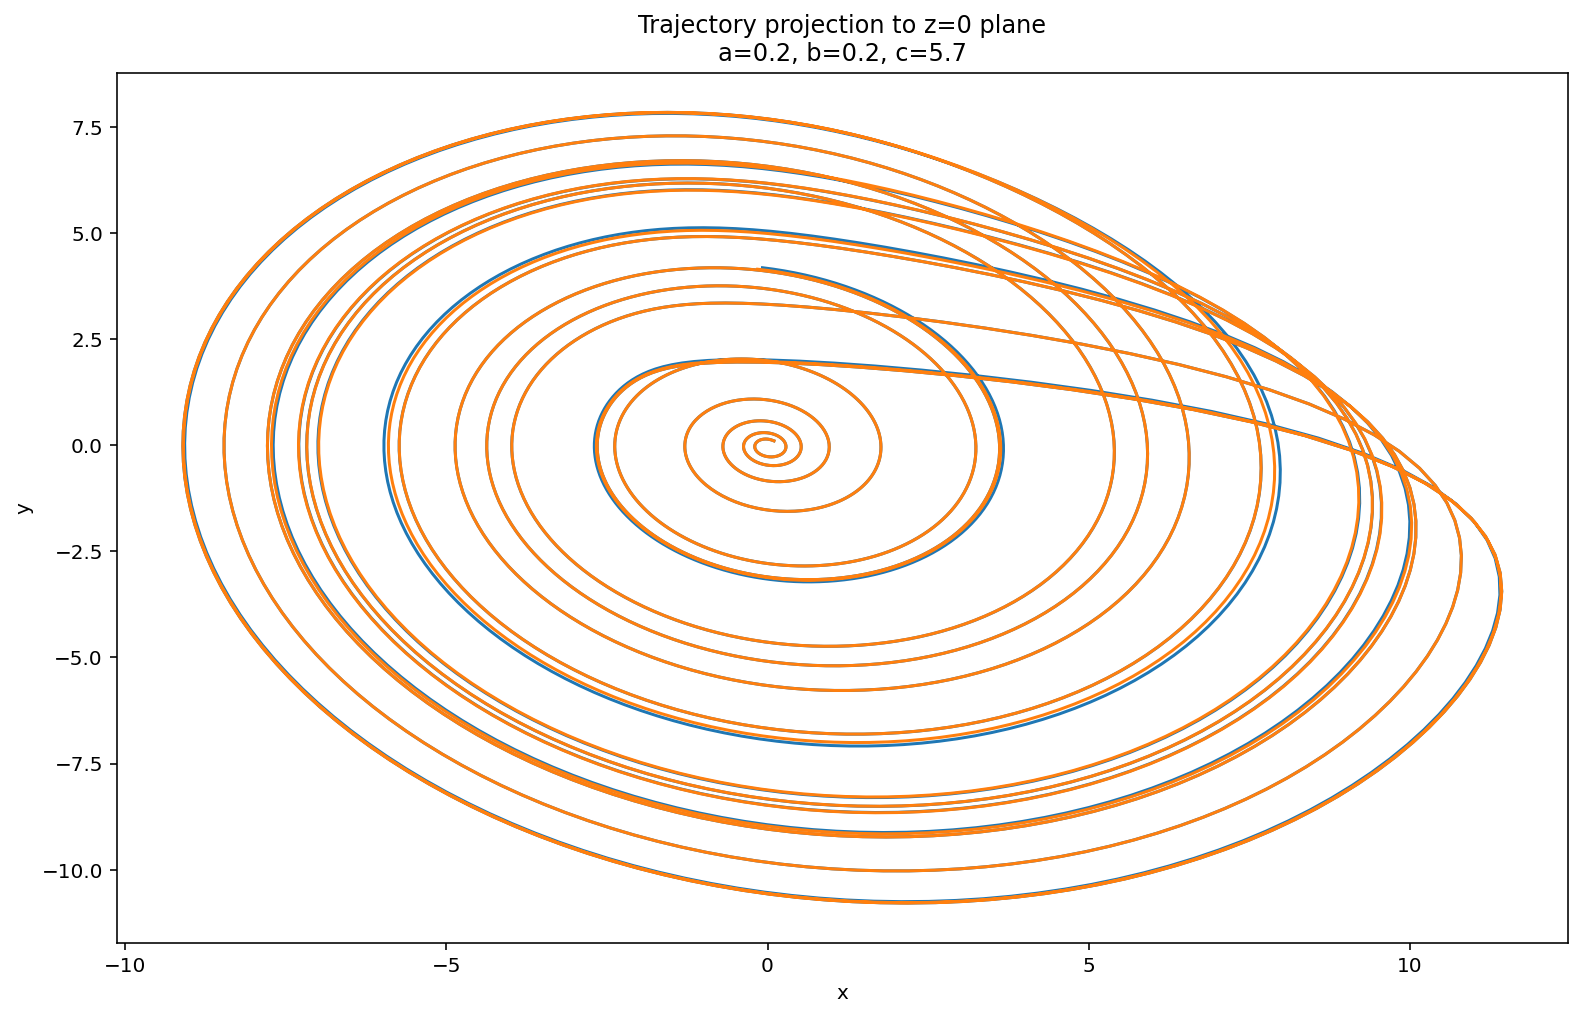

In [66]:
traj1, traj2 = plot2d(init1, [a,b,c], start, end, points, init2)
plot3d(traj1, traj2)